# Ford GoBike System

### Investigation Overview

In this investigation, I wanted to look at the factors affecting customer and subscriber riders that could be used to convert customer to subscribers. The main focus was on the four station name, weekday, time duration, rider length, latiude and longitude length and age

### Dataset Overview

This document explores a dataset containing user type, member gender, bike share for all trip and other variables for approximately 184,000 samples. 8,460 data points were removed from the analysis due to inconsistencies or missing information.

#### Goal of the Analysis
> Converting casual riders into annual members

### Limitation

* There was no sufficient data such as the actual cost of riders tickets on the bikes.

* Most of the variables in the dataset are string types, which do not allow a high level statistical method to be conducted.

* Their is no enough data to look at the other factor affecting the why riders still remain Subscribers and why csutomer still remain customer riders.

* Insufficient data to look at the other factor affecting Why would customer riders buy annual memberships?

In [1]:
# import all packages and set plots to be embedded inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

#####  Load in your dataset and describe its properties through the questions below


In [2]:
# Load the Dataset

df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


### What is the structure of your dataset?

> There are 183,412 rides in the dataset with 16 features (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender and bike_share_for_all_trip). Most variables are numeric in nature, but the variables user_type, member_gender, and bike_share_for_all_trip are ordered factor variables with the following levels.

* user_type: Customer and Subscriber

* member_gender: Male and other

* bike_share_for_all_trip: Yes, No

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out how to convert customer riders to subscriber riders

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that ride length, station name and weekday will have the strongest effect on this analysis



In [3]:
# checking the shape of the data

df.shape

(183412, 16)

In [4]:
# Checking the info of the data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
# Dropping off null values

df = df.dropna()

In [7]:
# Converting columns data types to Date Data type.

df['start_time']= df['start_time'].astype('datetime64[ns]')
df['end_time']= df['end_time'].astype('datetime64[ns]')


In [8]:
# Getting the time, latitude and longitude lenght/difference.

lat_length =  df['end_station_latitude'] - df['start_station_latitude']

long_length =  df['end_station_longitude'] - df['start_station_longitude']

ride_length =  df['end_time'] - df['start_time']

time_duration =  df['duration_sec']/60

df['ride_length'] = ride_length

df['lat_length'] = lat_length

df['long_length'] = long_length

df['time_duration']= time_duration

In [9]:
# creating a function to avoid code repition

def call():
    print(df.sample(5))

In [10]:
# confirming the new columns for the length

call()

        duration_sec              start_time                end_time  \
7621             811 2019-02-28 08:50:13.578 2019-02-28 09:03:45.032   
111922           308 2019-02-12 16:30:35.372 2019-02-12 16:35:43.923   
7619             266 2019-02-28 08:59:22.148 2019-02-28 09:03:48.818   
127125         13239 2019-02-10 13:07:32.499 2019-02-10 16:48:11.552   
104080           422 2019-02-14 09:01:48.492 2019-02-14 09:08:51.108   

        start_station_id                                 start_station_name  \
7621               132.0                          24th St at Chattanooga St   
111922             258.0                        University Ave at Oxford St   
7619                15.0  San Francisco Ferry Building (Harry Bridges Pl...   
127125             125.0                               20th St at Bryant St   
104080              95.0                              Sanchez St at 15th St   

        start_station_latitude  start_station_longitude  end_station_id  \
7621             

In [11]:
# converting the start_at to weekdays; where 0 = Sunday and 6 = Saturday

df['weekday'] = df['start_time'].dt.weekday

In [12]:
# Dropping off the unused column.

df = df.drop(['start_time','end_time','start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude','start_station_id','end_station_id','bike_id'],axis= 1)

In [13]:
call()

        duration_sec                               start_station_name  \
77201            670                      Valencia St at Clinton Park   
161586           406  Salesforce Transit Center (Natoma St at 2nd St)   
17978            112         Garfield Square (25th St at Harrison St)   
83014            304                            Laguna St at Hayes St   
8151             408                            Townsend St at 5th St   

                                      end_station_name   user_type  \
77201                            3rd St at Townsend St  Subscriber   
161586  San Francisco Caltrain (Townsend St at 4th St)  Subscriber   
17978                                     Precita Park  Subscriber   
83014                       Webster St at O'Farrell St    Customer   
8151                              Bryant St at 15th St  Subscriber   

        member_birth_year member_gender bike_share_for_all_trip  \
77201              1994.0          Male                      No   
161586

In [14]:
# copy the file

df_copy = df.copy()

In [15]:
# mapping the weekdays with str values by dictionary, else get NaNs for not matched values:

df_copy['weekday'] = df_copy['weekday'].map({0:'sunday', 1:'monday', 2:'tuesday', 3:'wednesday', 4:'thursday', 5:'friday', 6:'saturday' }) 

In [16]:
## drop off duplicates.

df_copy.drop_duplicates(inplace=True)

In [17]:
# convert the birth year data type to int

df_copy['member_birth_year'] = df_copy['member_birth_year'].astype(int)

In [18]:
# create a column for the user age to this date

df_copy['age'] = (2022 - df['member_birth_year']).astype(int)

In [19]:
# Query the data to riders Age less than 90 years

df_copy = df_copy.query('age < 90')

In [20]:
# checking for the new column

df_copy.sample(5)

,duration_sec,start_station_name,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip,ride_length,lat_length,long_length,time_duration,weekday,age
116955,457,14th St at Mission St,San Francisco Caltrain Station 2 (Townsend St...,Subscriber,1996,Female,No,0 days 00:07:37.651000,0.008375,0.024584,7.616667,monday,26
43397,614,Oregon St at Adeline St,Milvia St at Derby St,Subscriber,1992,Female,No,0 days 00:10:14.569000,0.002557,-0.001826,10.233333,thursday,30
144643,457,Telegraph Ave at Alcatraz Ave,Russell St at College Ave,Subscriber,1981,Male,No,0 days 00:07:37.124000,0.008251,0.006919,7.616667,wednesday,41
147158,897,Central Ave at Fell St,San Francisco Public Library (Grove St at Hyde...,Subscriber,1986,Male,No,0 days 00:14:57.157000,0.005457,0.028363,14.950000,wednesday,36
70947,485,The Embarcadero at Steuart St,Berry St at 4th St,Subscriber,1994,Male,No,0 days 00:08:05.643000,-0.015584,-0.002136,8.083333,monday,28


## Univariate Exploration

> In this section, we investigate distributions of individual variables. 

## Question 1: What are the factors that could possibly affects the riders for the frequent or less use of bikes

## Riders Age plot

The riders in the sample who commonly use bikes range in age from 27 to 39 years old. The plots also demonstrate that riders with 34 years old use bikes more frequently than other age groups. Additionally, cyclists over 50 utilize their bikes less frequently.

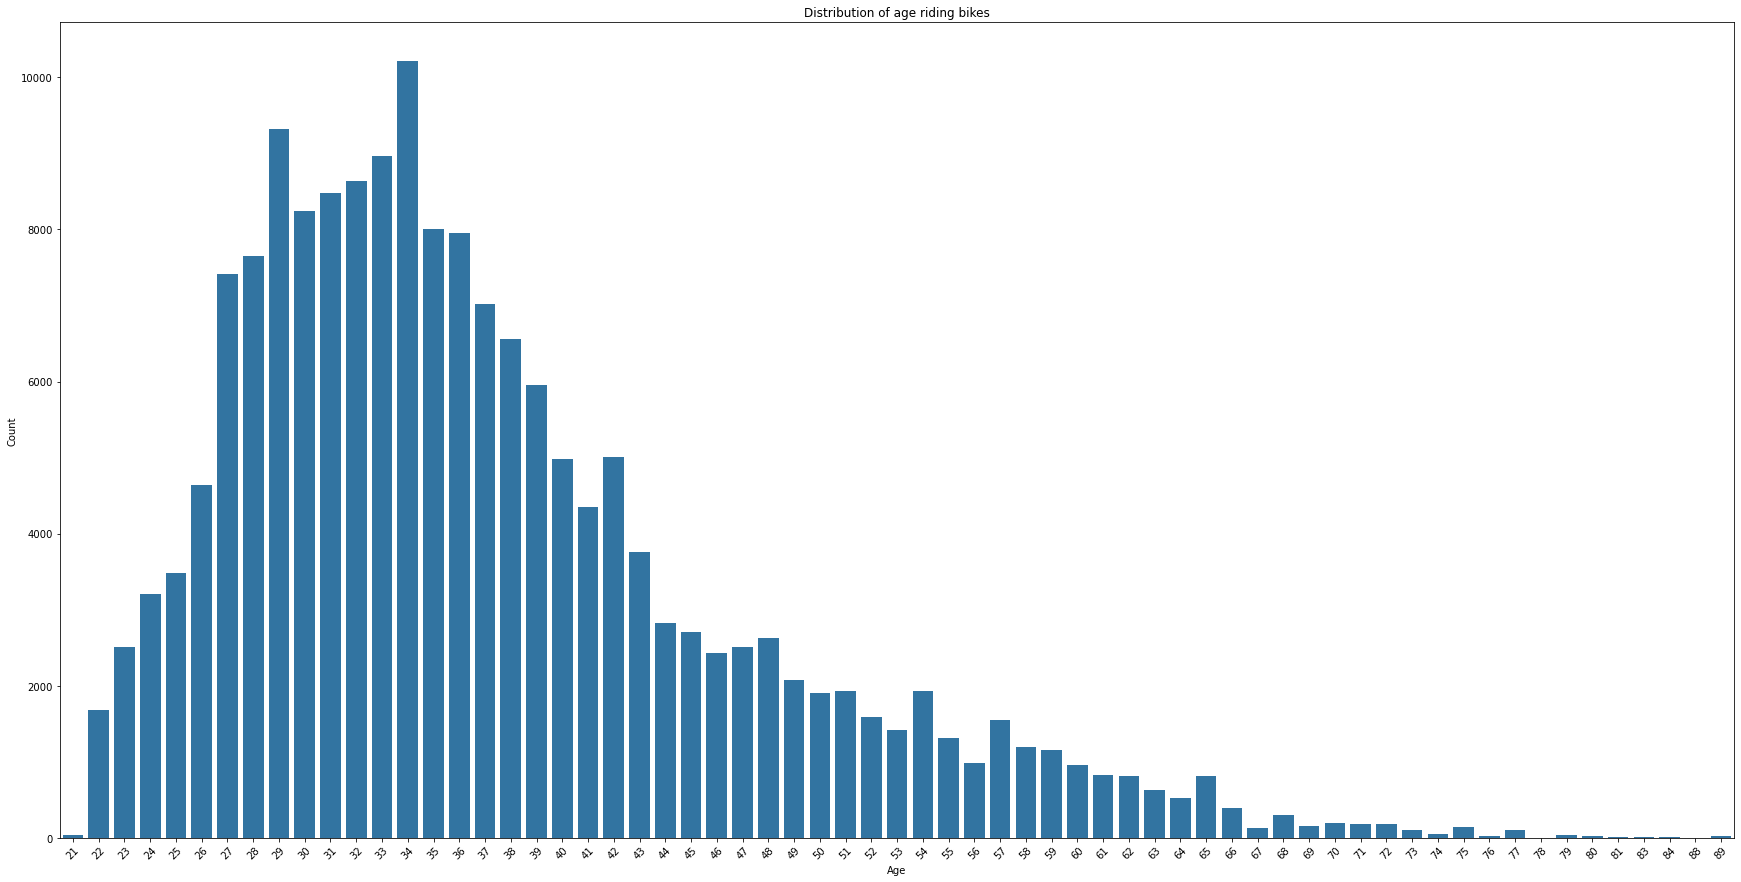

In [28]:
# The plot of riders age

plt.figure(figsize=[30, 15])
sb.countplot(data= df_copy, x='age', color=sb.color_palette()[0])
plt.xticks(rotation='45')
plt.title('Distribution of age riding bikes')
plt.xlabel('Age')
plt.ylabel('Count');

###  Riders Weekdays Plot

The plot demonstrates that both customers and subscribers ride bicycles primarily on weekdays, but frequently on Wednesday.

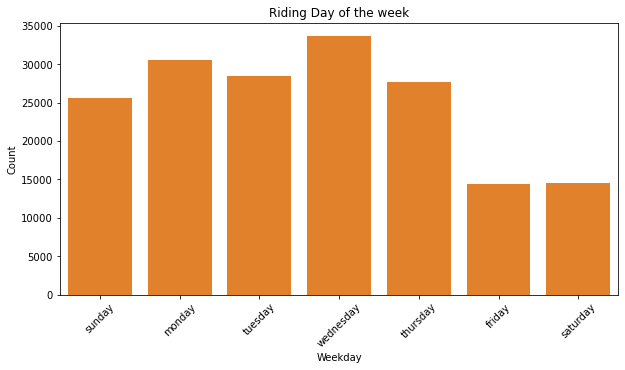

In [46]:
# plot of weekday riders start their rides..

order_1 =['sunday','monday','tuesday','wednesday','thursday','friday','saturday']
plt.figure(figsize=[10,5])
sb.countplot(data= df_copy, x='weekday', color=sb.color_palette()[1], order=order_1)
plt.xticks(rotation='45')
plt.title('Riding Day of the week')
plt.xlabel('Weekday')
plt.ylabel('Count');

The plot demonstrates that both customers and subscribers ride bicycles primarily on weekdays, but more frequently on Wednesday.

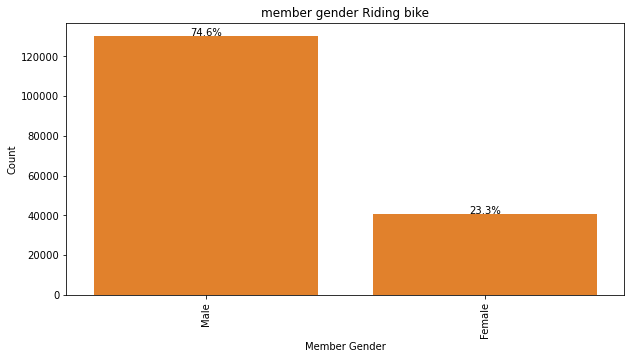

In [22]:
# Plot of gender riders

# Make a value count of the  member gender column.
dem =df_copy.member_gender.value_counts()
dem_s = df_copy.member_gender.value_counts().sum()

# The member column has other category part from male and female which is not needed.
df_copy_sub = df_copy.loc[df_copy['member_gender'].isin(['Male','Female'])]

# Plot of gender riders

plt.figure(figsize=[10,5])
sb.countplot(data= df_copy_sub, x='member_gender', color=sb.color_palette()[1])
plt.title('member gender Riding bike')
plt.xlabel('Member Gender')
plt.ylabel('Count')

locs, labels = plt.xticks(rotation=90) 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = dem[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/dem_s)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')


According to the plot, 23.3 percent of customers and subscribers are female, whereas 74 percent of riders are men. Males ride bikes more frequently than females do.

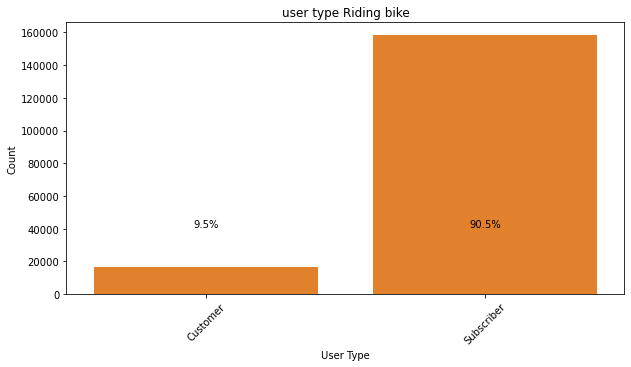

In [24]:
# Plot of user type column

# Make a value count of the  user type column.
dey = df_copy.user_type.value_counts()
dey_s = df_copy.user_type.value_counts().sum()

# Plot of user type column
plt.figure(figsize=[10,5])
sb.countplot(data= df_copy, x='user_type', color=sb.color_palette()[1])
plt.title('user type Riding bike')
plt.xlabel('User Type')
plt.ylabel('Count')
locs, labels = plt.xticks(rotation=45) 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    counts = dey[label.get_text()]
    pct_strings = '{:0.1f}%'.format(100*counts/dey_s)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_strings, ha = 'center', color = 'black')


The plot reveals that the majority of firm riders 90.5 percent are either annual or monthly subscribers, with just 9.5 percent being regular customers.

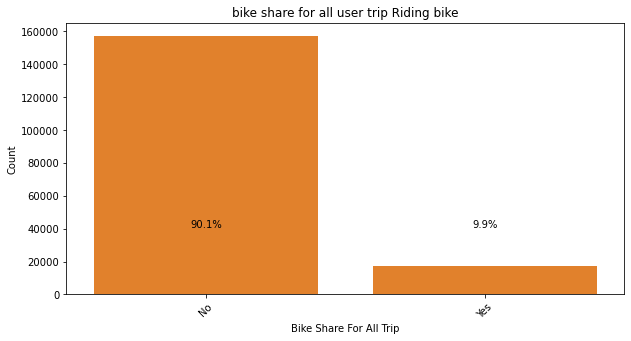

In [36]:
# Plot of bike share for all trip

# Make a value count of the  user type column.
dev = df_copy.bike_share_for_all_trip.value_counts()
dev_s = df_copy.bike_share_for_all_trip.value_counts().sum()

# Plot of bike share for all trip
plt.figure(figsize=[10,5])
sb.countplot(data= df_copy, x='bike_share_for_all_trip', color=sb.color_palette()[1])
plt.xticks(rotation='45')
plt.title('bike share for all user trip Riding bike')
plt.xlabel('Bike Share For All Trip')
plt.ylabel('Count')

locs, labels = plt.xticks(rotation=45) 

# loop through each pair of locations and labels
for lo, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    countsd = dev[label.get_text()]
    pct_stringsd = '{:0.1f}%'.format(100*countsd/dev_s)

    # print the annotation just below the top of the bar
    plt.text(lo, count+2, pct_stringsd, ha = 'center', color = 'black')


The plot shows that the company dose not allow bike share for 90.1% of user trip riders and dose allow for about 9.9% of the riders.


### Age Distribution

Age is a long-tailed distribution, with few aged years at the low end. When the age distribution is plotted, it appears to be roughly bimodal, with one peak falling between 28 and 40. It's interesting to see that the frequency rises abruptly before 38 as opposed to gradually.


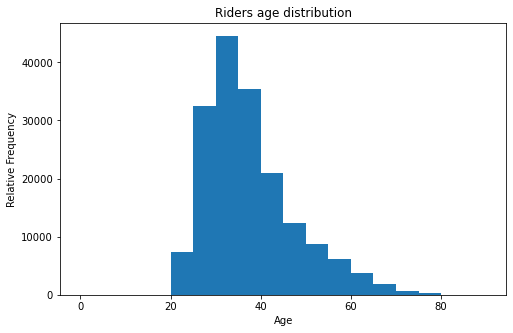

In [47]:
# start with a standard-scaled plot

binsize = 5
bins = np.arange(0, df_copy['age'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_copy, x = 'age', bins = bins)
plt.xlabel('Age')
plt.ylabel('Relative Frequency')
plt.title('Riders age distribution')
plt.show();

Age is a long-tailed distribution, with few aged years at the low end. When the age distribution is plotted, it appears to be roughly bimodal, with one peak falling between 28 and 40. It's interesting to see that the frequency rises abruptly before 38 as opposed to gradually.

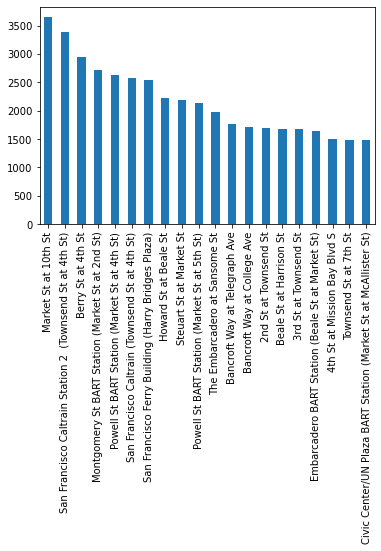

In [31]:
# plot of the start station name

df_copy['start_station_name'].value_counts().head(20).plot(kind='bar');

The plot demonstrates that customers and subscribers utilize Market St at 10th St and San Francisco Caltrain Station 2 (Townsend St at 4th St) more frequently than other stations.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> No transfromation was done on the data

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I filtered the data set to include only ages below 90 because the age variable took on a scatter group of values and there were less age counts towards 100 years.
I developed the age column, weekday column, time duration period, longitude and latitude location difference, and time duration period to track when riders arrived to rent bikes.

## Bivariate Exploration

> In this section, we investigate relationships between pairs of variables in our
data.

### Station name riders often start their rides

The Embarcadero station has the longest ride duration among the other stations, according to the map. Additionally, Powell Brat and San Francisco stations have longer ride times than other stations.

In [21]:
# COPY THE FILE SO AS NOT TP TAMPER WITH THE WORKING Data

df_copy_2= df_copy.copy()

In [22]:
# Most frequently used station

df_copy_2 = df_copy_2.loc[df_copy_2['start_station_name'].isin(['Market St at 10th St','San Francisco Caltrain Station 2  (Townsend St at 4th St)','Berry St at 4th St','Montgomery St BART Station (Market St at 2nd St)','Powell St BART Station (Market St at 4th St)','San Francisco Caltrain (Townsend St at 4th St)','San Francisco Ferry Building (Harry Bridges Plaza)','Howard St at Beale St','Steuart St at Market St','Powell St BART Station (Market St at 5th St)','The Embarcadero at Sansome St','Bancroft Way at Telegraph Ave','Bancroft Way at College Ave','2nd St at Townsend St','Beale St at Harrison St','3rd St at Townsend St','Embarcadero BART Station (Beale St at Market St)','4th St at Mission Bay Blvd S','Townsend St at 7th St','Civic Center/UN Plaza BART Station (Market St at McAllister St)'])]
    

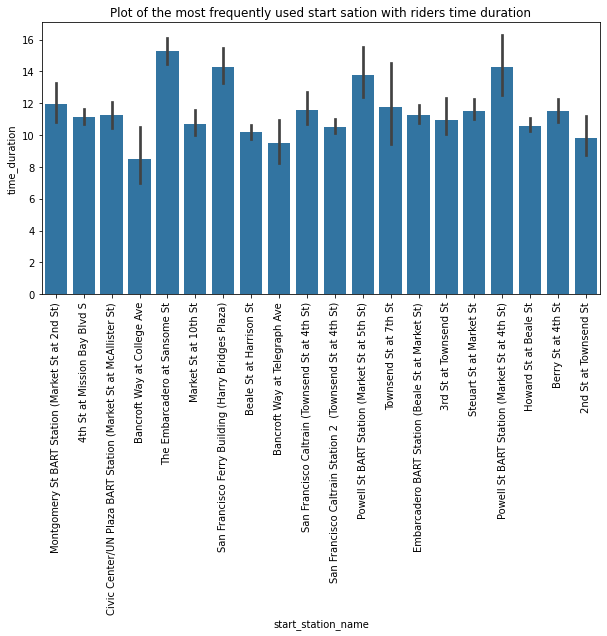

In [34]:
# Plot of the most frequently used sation with riders time duration

plt.figure(figsize = [10, 5])
ax = sb.barplot(data = df_copy_2, x = 'start_station_name', y = 'time_duration', color=sb.color_palette()[0])
plt.xticks(rotation=90)
plt.title('Plot of the most frequently used start sation with riders time duration');

The Embarcadero station has the longest ride duration among the other stations, according to the map. Additionally, Powell Brat and San Francisco stations have longer ride times than other stations.

### Question 3: Is there any relationship between latitude length, time duration and longitude length

0.004302952755091544

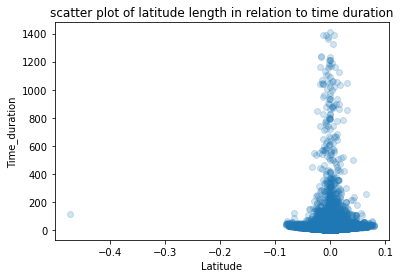

In [35]:
# Scatter plot of latitude length in relation to time duration

plt.scatter(data= df_copy, x='lat_length', y='time_duration', alpha=2/10)
plt.ylabel('Time_duration')
plt.xlabel('Latitude')
plt.title('scatter plot of latitude length in relation to time duration')

# correlation coeficient
corr = np.corrcoef(y=df_copy.time_duration , x= df_copy.lat_length)[0, 1]
corr

According to the graphs, there is a strong nonlinear correlation between time duration and latitude length that is focused between -0.1 and 0.1.

-0.002769848799547293

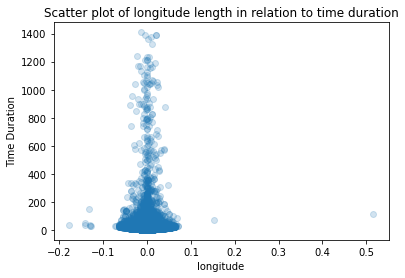

In [32]:
# Scatter plot of longitude length in relation to time duration

plt.scatter(data= df_copy, x='long_length', y='time_duration', alpha=2/10)
plt.ylabel('Time Duration')
plt.xlabel('longitude')
plt.title('Scatter plot of longitude length in relation to time duration')

# correlation coeficient
corr = np.corrcoef(y=df_copy.time_duration , x= df_copy.long_length)[0, 1]
corr

Additionally, the plots demonstrate a strong negative nonlinear relationship between time duration and longitude length, which is largely centered between -0.1 and 0.1.

0.00711812477947907

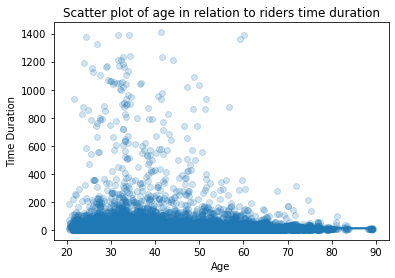

In [26]:
# Scatter plot of age in relation to riders time duration

sb.regplot(data= df_copy, x='age', y='time_duration', x_jitter=0.5, scatter_kws={'alpha':4/20})
plt.xlabel('Age')
plt.ylabel('Time Duration')
plt.title('Scatter plot of age in relation to riders time duration')

# correlation coeficient
corr = np.corrcoef(y=df_copy.time_duration , x= df_copy.age)[0, 1]
corr

The shows that there is no specific relationship bewteen time duration and riders age

-0.0040675905172857345

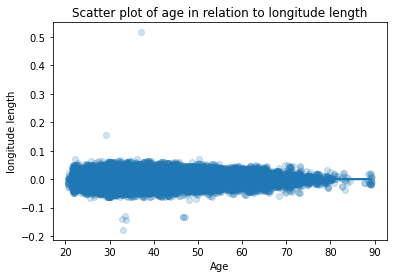

In [27]:
# Scatter plot of age in relation to riders time duration

sb.regplot(data= df_copy, x='age', y='long_length', x_jitter=0.5, scatter_kws={'alpha':4/20})
plt.xlabel('Age')
plt.ylabel('longitude length')
plt.title('Scatter plot of age in relation to longitude length')

# correlation coeficient
corr = np.corrcoef(y=df_copy.long_length , x= df_copy.age)[0, 1]
corr

Additionally, the plots demonstrate a strong positive linear relationship between age and longitude length, which is largely centered between -0.1 and 0.1.

0.000655280379356276

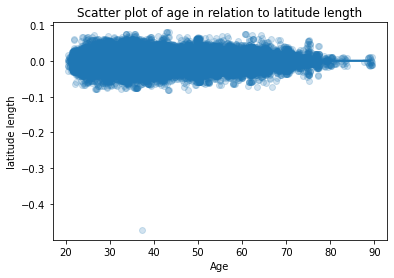

In [28]:
# Scatter plot of age in relation to riders time duration

sb.regplot(data= df_copy, x='age', y='lat_length', x_jitter=0.5, scatter_kws={'alpha':4/20})
plt.xlabel('Age')
plt.ylabel('latitude length')
plt.title('Scatter plot of age in relation to latitude length')

# correlation coeficient
corr = np.corrcoef(y=df_copy.lat_length , x= df_copy.age)[0, 1]
corr

The plots demonstrate a positive linear relationship between age and latitude length, which is largely centered between -0.1 and 0.1.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> surprisingly, the length of the longitude had a -0.002 correlation with time duration. When time duration and latitude and longitude length were plotted, a roughly nonlinear connection was found. Time duration, latitude, and longitude length did not significantly correlate with one another.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Age had a positive linear correlation  with longitude and latitude.

## Multivariate Exploration

> Creating plots of three or more variables to investigate our data even
further.

### Days of the week riders mostly use bikes and their time duration

The plot demonstrates that customers ride bikes for a longer period of time than subscribers do On weekends (Saturday and Friday), customers utilize bikes for longer periods of time than subscribers.

In [23]:
# copy another file

df_copy_1 =df_copy.copy()

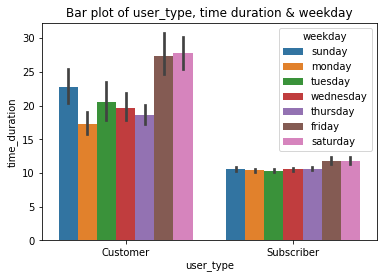

In [37]:
# Bar plot of user_type, time_duration, weekday

order_1 =['sunday','monday','tuesday','wednesday','thursday','friday','saturday']
ax = sb.barplot(data = df_copy_1, x = 'user_type', y = 'time_duration', hue = 'weekday', hue_order=order_1)
plt.title('Bar plot of user_type, time duration & weekday');

### How Riders Gender with Age uses bike often

It's interesting to note that while the male gender tends to have a higher average, the male gender with the best features (maximum time duration, user type) also seems to receive the highest riding time duration. Later, it will be worthwhile to look into this further.

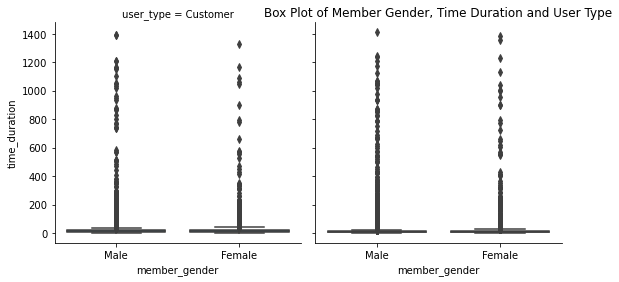

In [25]:
# Box plot of member gender, time duration and user type

df_copy_1 = df_copy_1.loc[df_copy_1['member_gender'].isin(['Male','Female'])]

g = sb.FacetGrid(data = df_copy_1, col = 'user_type', size = 4);
g.map(sb.boxplot, 'member_gender', 'time_duration');
plt.title('Box Plot of Member Gender, Time Duration and User Type');

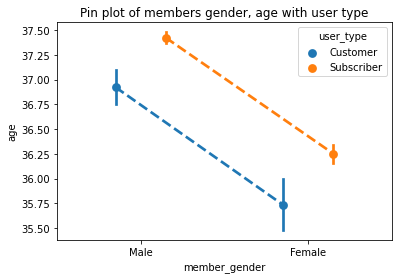

In [39]:
# Pin plot of members gender, age with user type

ax = sb.pointplot(data = df_copy_1, x = 'member_gender', y = 'age', hue = 'user_type',dodge = 0.3, linestyles = "--")
plt.title('Pin plot of members gender, age with user type');

It's interesting to note that male customers tend to be younger than male subscribers. For someone in their mid-35s, the plot is understandable. The low and high age grades at this user type have an equal age distribution.

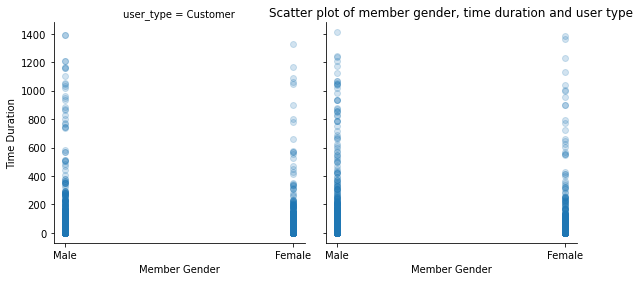

In [41]:
# Scatter plot of member gender, time duration and user type

g = sb.FacetGrid(data = df_copy_1, col = 'user_type', size = 4, col_wrap = 3)
g.map(sb.regplot, 'member_gender', 'time_duration', y_jitter = 0.04, fit_reg = False,
scatter_kws = {'alpha' : 1/5})
g.set_ylabels('Time Duration')
g.set_xlabels('Member Gender')
plt.title('Scatter plot of member gender, time duration and user type'); 

According to the plot, there is a significant and nonlinear relationship between time duration, user type, and member gender.

### Question 6: Is there any relationship between user type,longitude and latitude, age and time duration

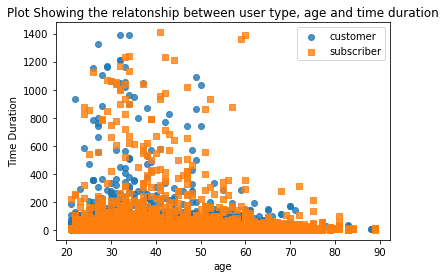

In [42]:
# Plot Showing the relatonship between user type, age and time duration

user_markers = [['Customer', 'o'],
               ['Subscriber', 's']]

for cat, marker in user_markers:
    df_cop = df_copy_1[df_copy_1['user_type'] == cat]
    plt.scatter(data = df_cop, x = 'age', y = 'time_duration', marker = marker, alpha=8/10)
plt.legend(['customer','subscriber'])
plt.xlabel('age')
plt.ylabel('Time Duration')
plt.title('Plot Showing the relatonship between user type, age and time duration');

The plot above could not define a specific relationship among the three variables

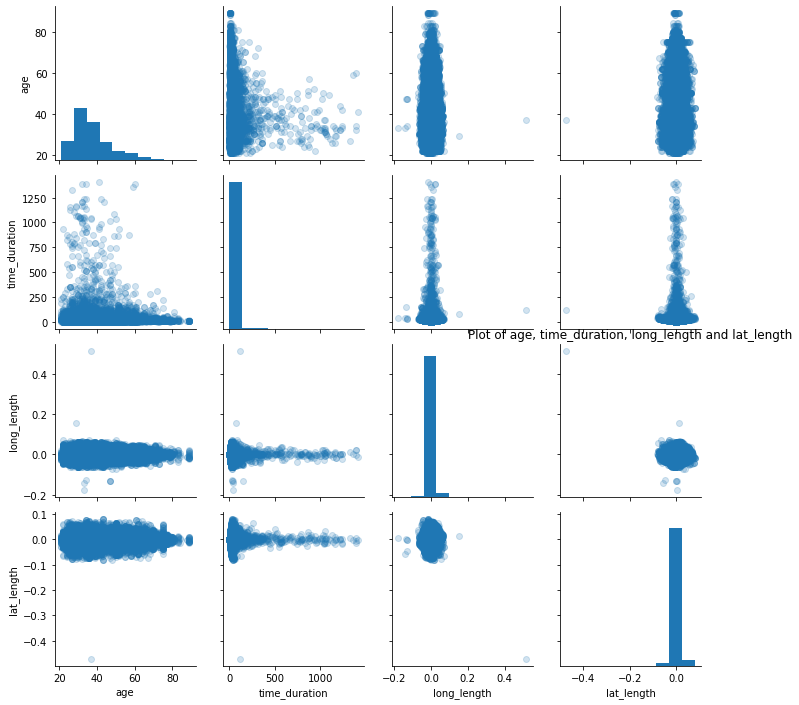

In [50]:
# Plot of age, time_duration, long_length and lat_length

g = sb.PairGrid(data = df_copy_1, vars = ['age', 'time_duration', 'long_length', 'lat_length'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter, alpha=1/5)
plt.title('Plot of age, time_duration, long_length and lat_length');

Age, time duration, longititude length, and latitude length are not well associated with one another as would be expected, but they do relate to one another in some way. It shouldn't come as a surprise that the general pattern between time duration and the three distinct dimensions is strong but non-linear since time duration is a measure of riders rigging length.

Surprisingly, despite the wide range of values for time duration, the correlation coefficient between age and time duration is relatively strong. It will be worthwhile to look at this further in this section. In the dataset, the relationships between latitude and longitude are point clustered, and there are no significant correlations between them. Since it doesn't appear that these variables will be of much more interest in the future, I won't do any additional analysis with them.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In this part, I expanded my inquiry into the relationship between time duration and age by examining the effects of the three categorical factors. The multivariate analysis here demonstrated that there is, in fact, a large nonlinear correlation between rising age and rider time duration, although this is first obscured in the dataset by the fact that younger riders had longer ride times.

### Were there any interesting or surprising interactions between features?

> Looking back at the point plots, it doesn't appear that the two categorical features interact in a predictable way. The features aren't entirely autonomous, though. The shape of the customer riders dots is quite comparable for the subscriber riders, which makes it fascinating when looking at things like the riders plot for age against user type and member gender.

## Conclusions

* From the analysis above, we found that there is a negative non linear strong relationship between time duration and longitude length and positive non linear strong relationship between time duration and latitude length , which is highly concentrated between -0.1 and 0.1.


* The Customer riders primarily utilize Cyclistic bikes on the weekends especially on friday and saturday and less frequently during the weekdays, compared to the Subscribers.


* This analysis found that there is no specific relationship bewteen time duration and riders age,also, their is no strong relationship  between age,latitude length and longitude length.


* More riders are Subscribers of Ford GoBike System than are Customers.


* The graph above indicates that the first 20 stations in the graph above contains the majority of the cyclists' start and end station names. The most commonly used stations are Embarcadero station, San francisco and Powell Brat station, while 16th St Depot station have only been used twice, by two customer riders.


* Additionally, we discovered that Subcribers and customers riders rode their bikes more frequently on the weekends (mostly Saturday and friday) than on other days of the week.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!



In [ ]:
!jupyter nbconvert Part_II_notebook.ipynb --to slides --post serve  --no-input --no-prompt